In [19]:
import networkx as nx

{('1', '4'): Text(1.4901160971803051e-08, -1.9206817775722963e-08, 'smth'),
 ('3', '2'): Text(-2.9802321943606103e-08, 0.8660254296429223, 'smth 2')}

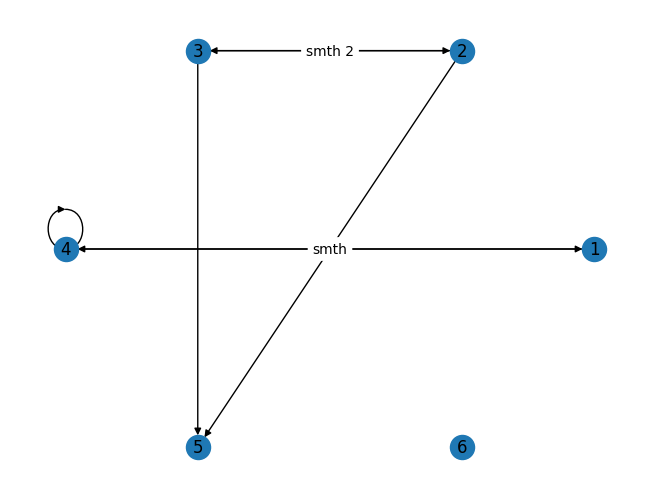

In [13]:
G = nx.DiGraph(directed=True)

G.add_node("1")
G.add_node("2")
G.add_node("3")
G.add_nodes_from(["4", "5","6"])

G.add_edge("2","5")
G.add_edge("3","2")
G.add_edges_from(
    [
        ("1","4"),
        ("4","1"),
        ("2","3"),
        ("4","4"),
        ("3","5"),
    ]
)

pos = nx.circular_layout(G)

nx.draw(G, pos, with_labels = True)

nx.draw_networkx_edge_labels(
    G, pos,
    edge_labels={
        ("1","4"): 'smth',
        ("3","2"): 'smth 2',
    }
)

In [48]:
import pandas as pd
path = "/content/drive/MyDrive/datasets/all-2015-02-01-00-00-00.txt"
column_names = ["col1", "col2", "col3", "Game", "col5", "Nickname", "col7", "col8", "col9", "Language", "col11", "col12", "col13", "col14",'col15','col16']

df = pd.read_csv(path, sep='\t', header=None, names=column_names)
df.head()

,col1,col2,col3,Game,col5,Nickname,col7,col8,col9,Language,col11,col12,col13,col14,col15,col16
0,12932973168,34846,2015-02-01T02:48:25Z,Dota 2,29578325,beyondthesummit,-1,197236,True,en,197742366,en,2012-04-07T04:16:39Z,3247460,1600x900,NaN
1,12932549648,27293,2015-02-01T02:18:13Z,StarCraft II: Heart of the Swarm,30220059,esltv_sc2,-1,57446,True,en,49119702,en,2012-05-02T09:59:20Z,3172375,1920x1080,NaN
2,12935159760,18725,2015-02-01T05:42:20Z,Hearthstone: Heroes of Warcraft,29795919,nl_kripp,-1,407203,True,en,102532780,en,2012-04-15T02:25:31Z,1956578,1280x720,NaN
3,12936016272,17817,2015-02-01T07:06:03Z,Dota 2,28633266,starladder3,-1,22098,True,ru,11939042,ru,2012-03-01T18:10:04Z,-1,-1,NaN
4,12935229856,24142,2015-02-01T05:49:08Z,Dota 2,24954143,dotacinema,-1,63221,True,en,7786910,en,2011-09-20T12:20:19Z,3472500,1280x720,NaN


In [79]:
import matplotlib.pyplot as plt
G=nx.from_pandas_edgelist(df, "Game", "Nickname")

pos = nx.spring_layout(G)

game_nodes = [node for node in G.nodes() if node in df["Game"].unique()]
other_nodes = [node for node in G.nodes() if node in df["Nickname"].unique()]

plt.figure(figsize=(30, 24))
nx.draw_networkx_nodes(G, pos, nodelist=game_nodes, node_color='r', node_size=50)
nx.draw_networkx_nodes(G, pos, nodelist=other_nodes, node_color='b', node_size=20)
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_labels(G, pos, labels={node: node for node in other_nodes}, font_size=8, alpha=0.5)
nx.draw_networkx_labels(G, pos, labels={node: node for node in game_nodes}, font_size=12, font_weight='bold')
plt.show()

Output hidden; open in https://colab.research.google.com to view.

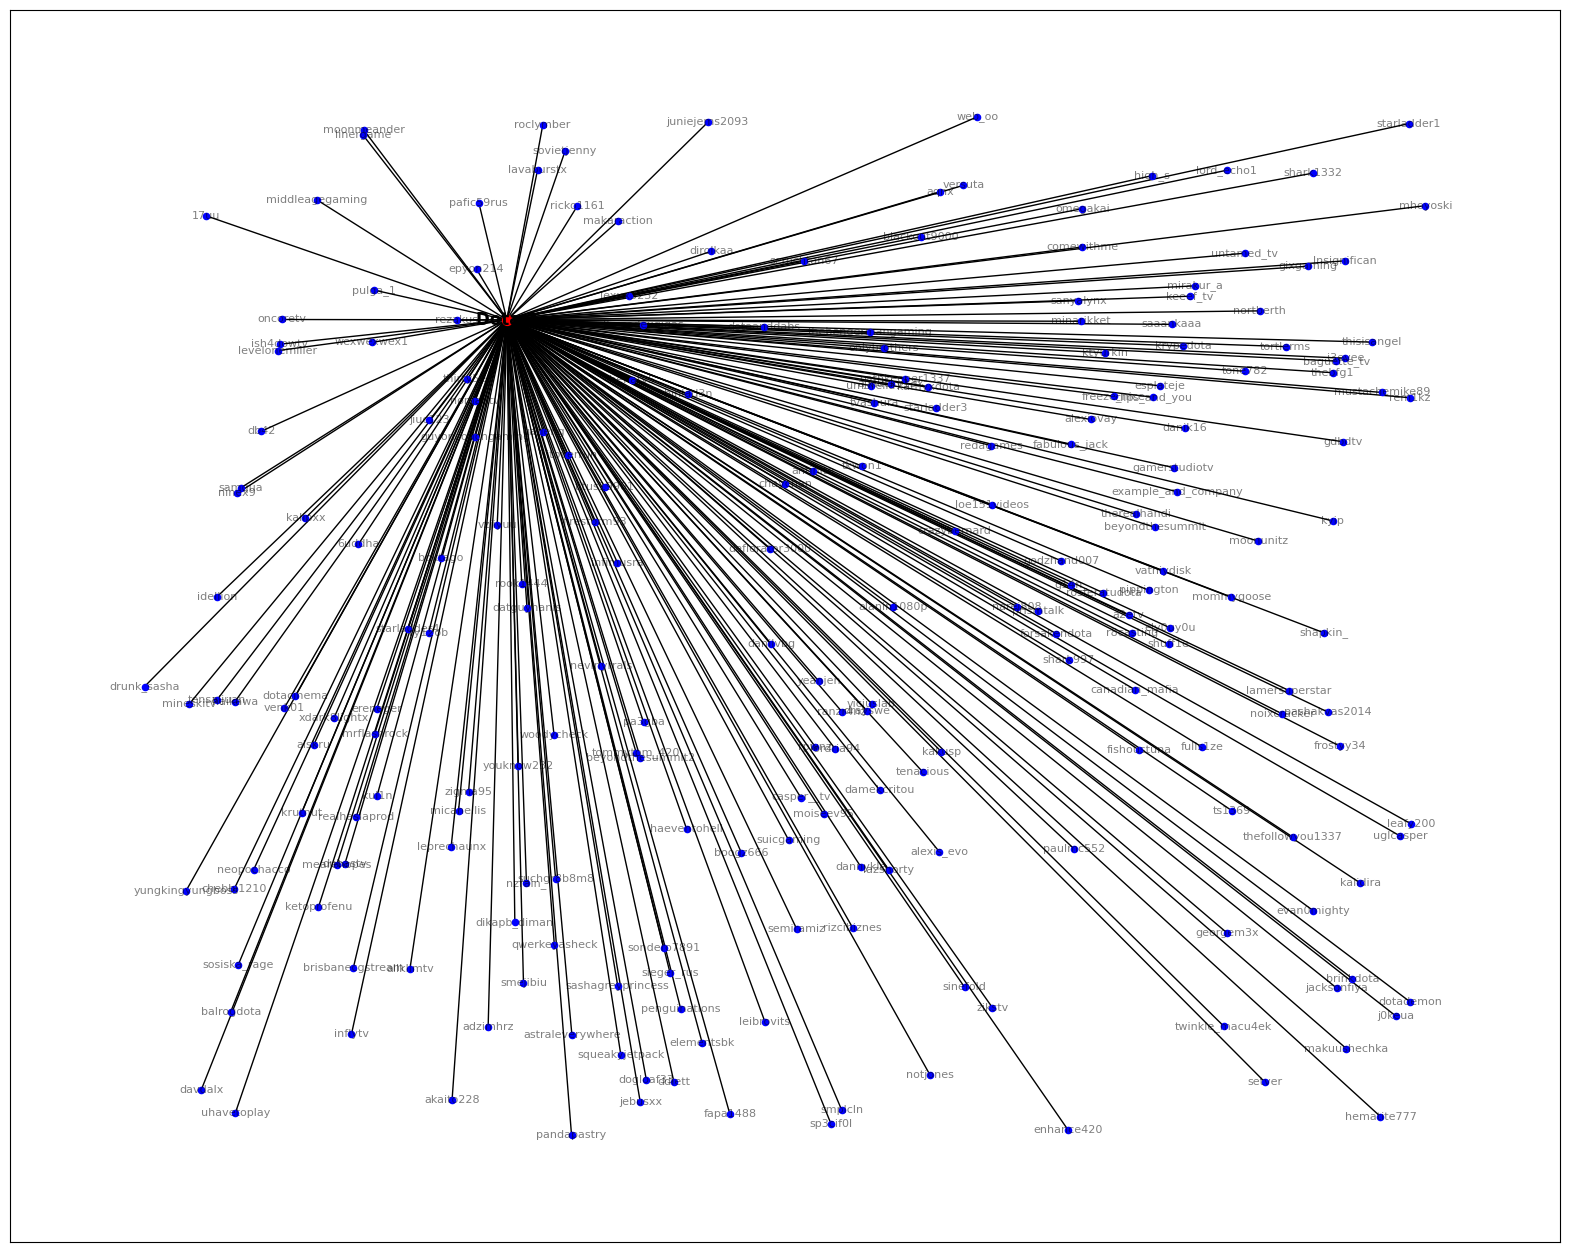

In [76]:
import matplotlib.pyplot as plt
G=nx.from_pandas_edgelist(df[df['Game'] == "Dota 2"][:1000], "Game", "Nickname")

pos = nx.random_layout(G)

game_nodes = [node for node in G.nodes() if node in df["Game"].unique()]
other_nodes = [node for node in G.nodes() if node not in game_nodes]

plt.figure(figsize=(20, 16))
nx.draw_networkx_nodes(G, pos, nodelist=game_nodes, node_color='r', node_size=50)
nx.draw_networkx_nodes(G, pos, nodelist=other_nodes, node_color='b', node_size=20)
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_labels(G, pos, labels={node: node for node in other_nodes}, font_size=8, alpha=0.5)
nx.draw_networkx_labels(G, pos, labels={node: node for node in game_nodes}, font_size=12, font_weight='bold')
plt.show()